### QUAAF Returns

#### Package imports

In [1]:
import math #Various math
import numpy as np #Linear algebra
import matplotlib.pyplot as plt #Basic plotting package
import seaborn as sns #Fancy plotting package
import pandas as pd #Dataframes
import statistics #Stats
sns.set_style('darkgrid')

#### Data loading

In [2]:
#Copy all the current holding funds from original data set and 
#Paste them into a new excel sheet. Name it as "QUAAF-data.xlsx".

#Loading in the spread sheet using pandas
fund = pd.read_excel('/Users/user/Desktop/QUAAF-data.xlsx',header=3,index_col=2);

#Checking the loaded data
fund.head();
fund.info();

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, nan to nan
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        107 non-null    object
 1   Unnamed: 1  106 non-null    object
 2   Unnamed: 3  105 non-null    object
 3   Fund A      5 non-null      object
 4   Fund B      106 non-null    object
 5   Fund C      106 non-null    object
 6   Fund D      56 non-null     object
 7   Fund E      106 non-null    object
 8   Fund F      33 non-null     object
 9   Fund G      30 non-null     object
 10  Fund H      27 non-null     object
 11  Fund I      19 non-null     object
 12  Fund J      14 non-null     object
 13  Fund K      14 non-null     object
 14  Fund L      106 non-null    object
 15  Fund M      106 non-null    object
dtypes: object(16)
memory usage: 16.3+ KB


#### Data Cleaning

In [3]:
#Dropping first 3 rows
fund1 = fund.drop(fund.index[1:3])
fund1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2012-01-31 00:00:00 to 2020-09-30 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        105 non-null    object
 1   Unnamed: 1  105 non-null    object
 2   Unnamed: 3  104 non-null    object
 3   Fund A      3 non-null      object
 4   Fund B      104 non-null    object
 5   Fund C      104 non-null    object
 6   Fund D      54 non-null     object
 7   Fund E      104 non-null    object
 8   Fund F      31 non-null     object
 9   Fund G      28 non-null     object
 10  Fund H      25 non-null     object
 11  Fund I      17 non-null     object
 12  Fund J      12 non-null     object
 13  Fund K      12 non-null     object
 14  Fund L      104 non-null    object
 15  Fund M      104 non-null    object
dtypes: object(16)
memory usage: 13.9+ KB


In [4]:
#Drop first 3 columns
fund2 = fund1.drop(fund.columns[0:3],axis=1)
fund2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2012-01-31 00:00:00 to 2020-09-30 00:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fund A  3 non-null      object
 1   Fund B  104 non-null    object
 2   Fund C  104 non-null    object
 3   Fund D  54 non-null     object
 4   Fund E  104 non-null    object
 5   Fund F  31 non-null     object
 6   Fund G  28 non-null     object
 7   Fund H  25 non-null     object
 8   Fund I  17 non-null     object
 9   Fund J  12 non-null     object
 10  Fund K  12 non-null     object
 11  Fund L  104 non-null    object
 12  Fund M  104 non-null    object
dtypes: object(13)
memory usage: 11.5+ KB


In [5]:
#Checking the dataframe now
fund2.head().append(fund2.tail())

,Fund A,Fund B,Fund C,Fund D,Fund E,Fund F,Fund G,Fund H,Fund I,Fund J,Fund K,Fund L,Fund M
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-03-31,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-04-30,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-05-31,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2020-05-31,NaN,57444,29623,22186,57048,54378,49041,27722,32692,26836,25746,57012,31340
2020-06-30,NaN,58083,30093,21420,58954,54709,51010,28335,33935,32655,26349,57764,31361
2020-07-31,2654,57908,31371,21037,61721,54355,52262,30914,35579,37275,26851,60290,25343
2020-08-31,5731,60128,32611,21089,63558,54690,53869,31276,35489,43073,28067,61121,25362
2020-09-30,8077,61219,33425,0,64598,55026,53668,31318,35621,44022,29037,60310,25370


In [6]:
#Replacing NaNs with 0s (No position = $0 position)
fund2 = fund2.fillna(0)
fund2

,Fund A,Fund B,Fund C,Fund D,Fund E,Fund F,Fund G,Fund H,Fund I,Fund J,Fund K,Fund L,Fund M
2012-01-31,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2012-02-29,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2012-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2012-04-30,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2012-05-31,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0,57444,29623,22186,57048,54378,49041,27722,32692,26836,25746,57012,31340.0
2020-06-30,0,58083,30093,21420,58954,54709,51010,28335,33935,32655,26349,57764,31361.0
2020-07-31,2654,57908,31371,21037,61721,54355,52262,30914,35579,37275,26851,60290,25343.0
2020-08-31,5731,60128,32611,21089,63558,54690,53869,31276,35489,43073,28067,61121,25362.0


#### Defining a function to calculate returns

In [7]:
#Using pythons datetime package
import datetime 

#Calculating how many months have passed since January, April (transition periods)
current_month = fund2.index[-1]

#Defining January & April start dates (2019/2020)
jan = datetime.datetime(2019, 12, 31)
april = datetime.datetime(2020,5,29)

#Calcuating differences
delta_jan = (current_month - jan)
delta_april = (current_month - april)
months_since_jan = int(delta_jan.days)//30
months_since_april = int(delta_april.days)//30

In [8]:
#Using pythons defaultdict function from the collections package
from collections import defaultdict

#https://www.accelebrate.com/blog/using-defaultdict-python
#Change the cumulative since inception formula
#Change the content of the output
#Find a way to upoad the input automatically
# find a way to combine the scotiastatement summary to this python file (i.e. consolidate)

def get_return(fund):
    fund_returns = defaultdict(pd.DataFrame)
    fund_return = pd.DataFrame(fund2[fund].dropna()) #pull a fund out of data frame without NA value
    fund_return = fund_return[(fund_return != 0).all(1)].copy() #clean 0 value 
    fund_return["monthly_return"] = fund_return[fund].pct_change() #calculate monthly return
    fund_return["return_since_jan"] = fund_return[fund]/fund_return[fund].shift(months_since_jan)-1 #return as of Jan 1st
    fund_return["return_since_april"] = fund_return[fund]/fund_return[fund].shift(months_since_april)-1 #return as of Apr 1st
    fund_return["3m_return"] = fund_return[fund]/fund_return[fund].shift(3)-1 #3 month return
    fund_return["6m_return"] = fund_return[fund]/fund_return[fund].shift(6)-1 #6 month return
    fund_return["1y_return"] = fund_return[fund]/fund_return[fund].shift(12)-1 #1 year return
    fund_return["2y_return"] = fund_return[fund]/fund_return[fund].shift(24)-1 #2 year return
    fund_return["5y_return"] = fund_return[fund]/fund_return[fund].shift(60)-1 #5 year return
    fund_return["cumulative_return"] = ((1 + fund_return["monthly_return"]).cumprod() - 1) #cumulative return, and total return
    fund_returns[fund] = fund_return
    return fund_returns[fund]

#### Compiling returns in a list of dfs


In [9]:
#Extracting fund names from df
my_funds = list(fund2.columns.values) 
my_funds

#Using a for loop to run get_return on each fund in my_funds & store each df in a list
returns_list = []
for i in my_funds:
    returns = get_return(i)
    returns_list.append(returns)

In [10]:
#Checking our list of dataframes
returns_list

[            Fund A  monthly_return  return_since_jan  return_since_april  \
 2020-07-31    2654             NaN               NaN                 NaN   
 2020-08-31    5731        1.159382               NaN                 NaN   
 2020-09-30    8077        0.409353               NaN                 NaN   
 
             3m_return  6m_return  1y_return  2y_return  5y_return  \
 2020-07-31        NaN        NaN        NaN        NaN        NaN   
 2020-08-31        NaN        NaN        NaN        NaN        NaN   
 2020-09-30        NaN        NaN        NaN        NaN        NaN   
 
             cumulative_return  
 2020-07-31                NaN  
 2020-08-31           1.159382  
 2020-09-30           2.043331  ,
             Fund B  monthly_return  return_since_jan  return_since_april  \
 2015-04-30   50000             NaN               NaN                 NaN   
 2015-05-31   49385       -0.012300               NaN                 NaN   
 2015-06-30   49502        0.002369         

In [11]:
#Checking the first df in the list
returns_list[0]

,Fund A,monthly_return,return_since_jan,return_since_april,3m_return,6m_return,1y_return,2y_return,5y_return,cumulative_return
2020-07-31,2654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,5731,1.159382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.159382
2020-09-30,8077,0.409353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043331


#### Producing risk summary df

In [12]:
#Using a for loop to select the last row in every df in returns_list
tails_list = []
for i in returns_list:
    tails = i.tail(1)
    tails_list.append(tails)

In [13]:
#Checking the results (first 3 funds)
tails_list[1]

,Fund B,monthly_return,return_since_jan,return_since_april,3m_return,6m_return,1y_return,2y_return,5y_return,cumulative_return
2020-09-30,61219,0.018145,0.041228,0.065716,0.053992,0.058859,0.070412,0.015746,0.242496,0.22438


In [14]:
#Converting list of dfs to a single df
summary_df = pd.concat(tails_list)

#Checking our final df
summary_df

,Fund A,monthly_return,return_since_jan,return_since_april,3m_return,6m_return,1y_return,2y_return,5y_return,cumulative_return,...,Fund D,Fund E,Fund F,Fund G,Fund H,Fund I,Fund J,Fund K,Fund L,Fund M
2020-09-30,8077.0,0.409353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.018145,0.041228,0.065716,0.053992,0.058859,0.070412,0.015746,0.242496,0.224380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.024961,-0.007807,0.128346,0.110723,-0.024572,0.006838,0.049780,0.242981,0.337000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,0.002472,-0.063294,-0.014256,-0.049446,-0.038174,-0.020119,-0.026092,NaN,-0.156440,...,21089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.016363,-0.021198,0.132345,0.095736,-0.029594,0.004931,0.042441,0.273921,2.229900,...,NaN,64598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.006144,0.016985,0.011917,0.005794,0.012699,0.023245,0.062093,NaN,0.100542,...,NaN,NaN,55026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,-0.003731,0.045121,0.094350,0.052107,0.070064,0.096294,0.066322,NaN,0.073360,...,NaN,NaN,NaN,53668.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.001343,0.156158,0.129716,0.105276,0.099881,0.171642,0.252720,NaN,0.252720,...,NaN,NaN,NaN,NaN,31318.0,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.003719,0.378148,0.089594,0.049683,0.429701,0.497625,NaN,NaN,0.441096,...,NaN,NaN,NaN,NaN,NaN,35621.0,NaN,NaN,NaN,NaN
2020-09-30,NaN,0.022032,0.842927,0.640408,0.348094,0.686731,NaN,NaN,NaN,0.760880,...,NaN,NaN,NaN,NaN,NaN,NaN,44022.0,NaN,NaN,NaN


#### Cleaning up summary_df

In [15]:
#Changing the first column of every df in tails to "position_value"
for i in tails_list:
    i.columns = ['Position_Value','Monthly_Return','Return_Since_April','Return_Since_Jan','3M_Return','6M_Return','1Y_Return','2Y_Return','5Y_Return','Cumulative_Return']
    
#Creating a new summary df
summary_df_fixed = pd.concat(tails_list)

#Checking the results
summary_df_fixed

,Position_Value,Monthly_Return,Return_Since_April,Return_Since_Jan,3M_Return,6M_Return,1Y_Return,2Y_Return,5Y_Return,Cumulative_Return
2020-09-30,8077.0,0.409353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043331
2020-09-30,61219.0,0.018145,0.041228,0.065716,0.053992,0.058859,0.070412,0.015746,0.242496,0.224380
2020-09-30,33425.0,0.024961,-0.007807,0.128346,0.110723,-0.024572,0.006838,0.049780,0.242981,0.337000
2020-08-31,21089.0,0.002472,-0.063294,-0.014256,-0.049446,-0.038174,-0.020119,-0.026092,NaN,-0.156440
2020-09-30,64598.0,0.016363,-0.021198,0.132345,0.095736,-0.029594,0.004931,0.042441,0.273921,2.229900
2020-09-30,55026.0,0.006144,0.016985,0.011917,0.005794,0.012699,0.023245,0.062093,NaN,0.100542
2020-09-30,53668.0,-0.003731,0.045121,0.094350,0.052107,0.070064,0.096294,0.066322,NaN,0.073360
2020-09-30,31318.0,0.001343,0.156158,0.129716,0.105276,0.099881,0.171642,0.252720,NaN,0.252720
2020-09-30,35621.0,0.003719,0.378148,0.089594,0.049683,0.429701,0.497625,NaN,NaN,0.441096
2020-09-30,44022.0,0.022032,0.842927,0.640408,0.348094,0.686731,NaN,NaN,NaN,0.760880


In [16]:
#Converting list of position names my_funds to a numpy array
name_array = np.array(my_funds)

#Adding position names to the end summary_df_fixed
summary_df_fixed['Position_Name'] = name_array

#Checking the results
summary_df_fixed

,Position_Value,Monthly_Return,Return_Since_April,Return_Since_Jan,3M_Return,6M_Return,1Y_Return,2Y_Return,5Y_Return,Cumulative_Return,Position_Name
2020-09-30,8077.0,0.409353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043331,Fund A
2020-09-30,61219.0,0.018145,0.041228,0.065716,0.053992,0.058859,0.070412,0.015746,0.242496,0.224380,Fund B
2020-09-30,33425.0,0.024961,-0.007807,0.128346,0.110723,-0.024572,0.006838,0.049780,0.242981,0.337000,Fund C
2020-08-31,21089.0,0.002472,-0.063294,-0.014256,-0.049446,-0.038174,-0.020119,-0.026092,NaN,-0.156440,Fund D
2020-09-30,64598.0,0.016363,-0.021198,0.132345,0.095736,-0.029594,0.004931,0.042441,0.273921,2.229900,Fund E
2020-09-30,55026.0,0.006144,0.016985,0.011917,0.005794,0.012699,0.023245,0.062093,NaN,0.100542,Fund F
2020-09-30,53668.0,-0.003731,0.045121,0.094350,0.052107,0.070064,0.096294,0.066322,NaN,0.073360,Fund G
2020-09-30,31318.0,0.001343,0.156158,0.129716,0.105276,0.099881,0.171642,0.252720,NaN,0.252720,Fund H
2020-09-30,35621.0,0.003719,0.378148,0.089594,0.049683,0.429701,0.497625,NaN,NaN,0.441096,Fund I
2020-09-30,44022.0,0.022032,0.842927,0.640408,0.348094,0.686731,NaN,NaN,NaN,0.760880,Fund J


In [17]:
#Reordering the columns so "Position_Name" is the first column
summary_df_final = summary_df_fixed[['Position_Name','Position_Value','Monthly_Return','Return_Since_April','Return_Since_Jan','3M_Return','6M_Return','1Y_Return','2Y_Return',
                                      '5Y_Return','Cumulative_Return']]

#Checking the result
summary_df_final

,Position_Name,Position_Value,Monthly_Return,Return_Since_April,Return_Since_Jan,3M_Return,6M_Return,1Y_Return,2Y_Return,5Y_Return,Cumulative_Return
2020-09-30,Fund A,8077.0,0.409353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043331
2020-09-30,Fund B,61219.0,0.018145,0.041228,0.065716,0.053992,0.058859,0.070412,0.015746,0.242496,0.224380
2020-09-30,Fund C,33425.0,0.024961,-0.007807,0.128346,0.110723,-0.024572,0.006838,0.049780,0.242981,0.337000
2020-08-31,Fund D,21089.0,0.002472,-0.063294,-0.014256,-0.049446,-0.038174,-0.020119,-0.026092,NaN,-0.156440
2020-09-30,Fund E,64598.0,0.016363,-0.021198,0.132345,0.095736,-0.029594,0.004931,0.042441,0.273921,2.229900
2020-09-30,Fund F,55026.0,0.006144,0.016985,0.011917,0.005794,0.012699,0.023245,0.062093,NaN,0.100542
2020-09-30,Fund G,53668.0,-0.003731,0.045121,0.094350,0.052107,0.070064,0.096294,0.066322,NaN,0.073360
2020-09-30,Fund H,31318.0,0.001343,0.156158,0.129716,0.105276,0.099881,0.171642,0.252720,NaN,0.252720
2020-09-30,Fund I,35621.0,0.003719,0.378148,0.089594,0.049683,0.429701,0.497625,NaN,NaN,0.441096
2020-09-30,Fund J,44022.0,0.022032,0.842927,0.640408,0.348094,0.686731,NaN,NaN,NaN,0.760880


#### Assuming all out of date positions have been reduced to 0 (and hence should be removed)

In [18]:
#Reordering df by index (in this case date)
summary_df_final = summary_df_final.sort_index()

#Using some loops to drop all outdated positions from the final df
for i in range (0,len(summary_df_final.index)):
    if summary_df_final.index[0] != summary_df_final.index[1]:
        summary_df_final = summary_df_final.drop(summary_df_final.index[0])

#Checking the results
summary_df_final

,Position_Name,Position_Value,Monthly_Return,Return_Since_April,Return_Since_Jan,3M_Return,6M_Return,1Y_Return,2Y_Return,5Y_Return,Cumulative_Return
2020-09-30,Fund A,8077.0,0.409353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043331
2020-09-30,Fund B,61219.0,0.018145,0.041228,0.065716,0.053992,0.058859,0.070412,0.015746,0.242496,0.224380
2020-09-30,Fund C,33425.0,0.024961,-0.007807,0.128346,0.110723,-0.024572,0.006838,0.049780,0.242981,0.337000
2020-09-30,Fund E,64598.0,0.016363,-0.021198,0.132345,0.095736,-0.029594,0.004931,0.042441,0.273921,2.229900
2020-09-30,Fund F,55026.0,0.006144,0.016985,0.011917,0.005794,0.012699,0.023245,0.062093,NaN,0.100542
2020-09-30,Fund G,53668.0,-0.003731,0.045121,0.094350,0.052107,0.070064,0.096294,0.066322,NaN,0.073360
2020-09-30,Fund H,31318.0,0.001343,0.156158,0.129716,0.105276,0.099881,0.171642,0.252720,NaN,0.252720
2020-09-30,Fund I,35621.0,0.003719,0.378148,0.089594,0.049683,0.429701,0.497625,NaN,NaN,0.441096
2020-09-30,Fund J,44022.0,0.022032,0.842927,0.640408,0.348094,0.686731,NaN,NaN,NaN,0.760880
2020-09-30,Fund K,29037.0,0.034560,0.152536,0.127826,0.102015,0.133638,NaN,NaN,NaN,0.161480


#### Viz for monthly report

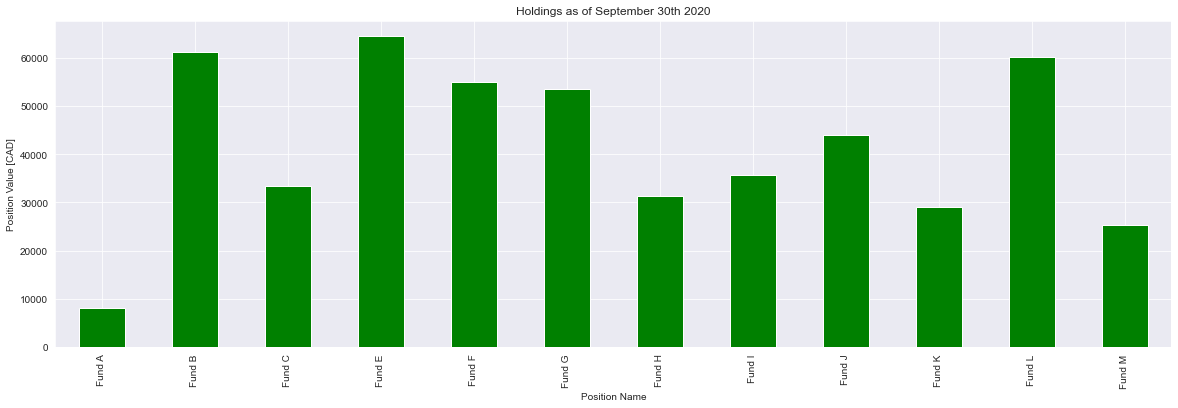

In [36]:
#Visualizing our positions by value
plt1 = summary_df_final.plot(x="Position_Name",y="Position_Value", 
                      kind = 'bar',figsize = (20,6), color = "green",
                      legend = False, title = 'Holdings as of September 30th 2020')
plt1.set(xlabel = "Position Name", ylabel = "Position Value [CAD]");

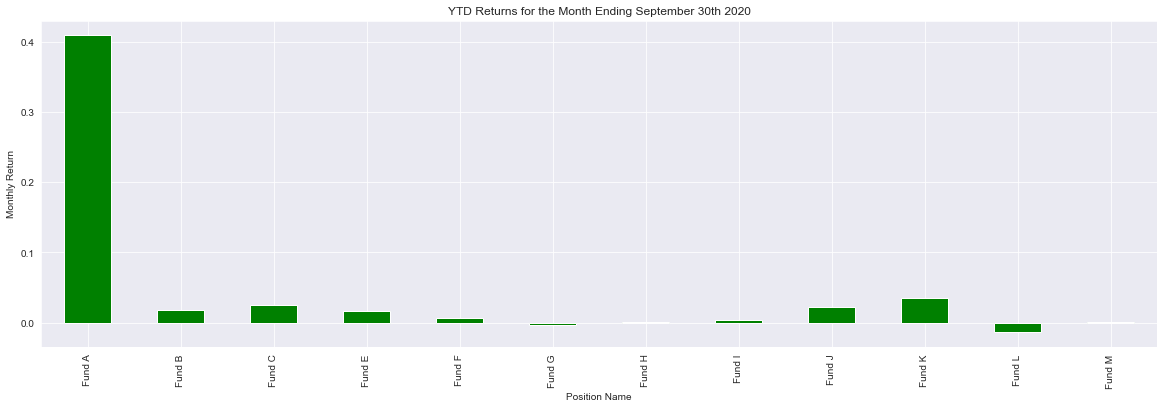

In [29]:
#By this past months return
plt2 = summary_df_final.plot(x="Position_Name",y="Monthly_Return", 
                      kind = 'bar',figsize = (20,6), color = "green",
                      legend = False, title = 'YTD Returns for the Month Ending September 30th 2020')
plt2.set(xlabel = "Position Name", ylabel = "Monthly Return");

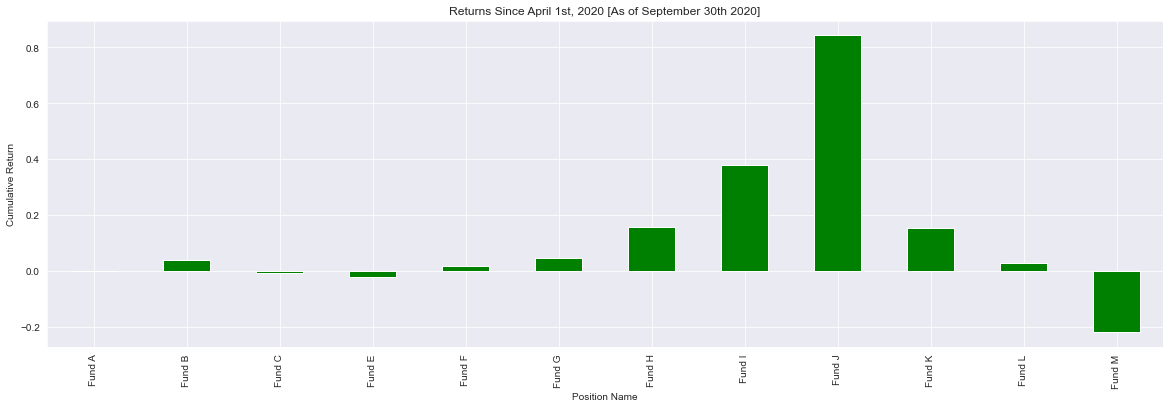

In [35]:
#By return since April 1st, 2020
plt3 = summary_df_final.plot(x="Position_Name",y="Return_Since_April", 
                      kind = 'bar',figsize = (20,6), color = "green",
                      legend = False, title = 'Returns Since April 1st, 2020 [As of September 30th 2020]')
plt3.set(xlabel = "Position Name", ylabel = "Cumulative Return");

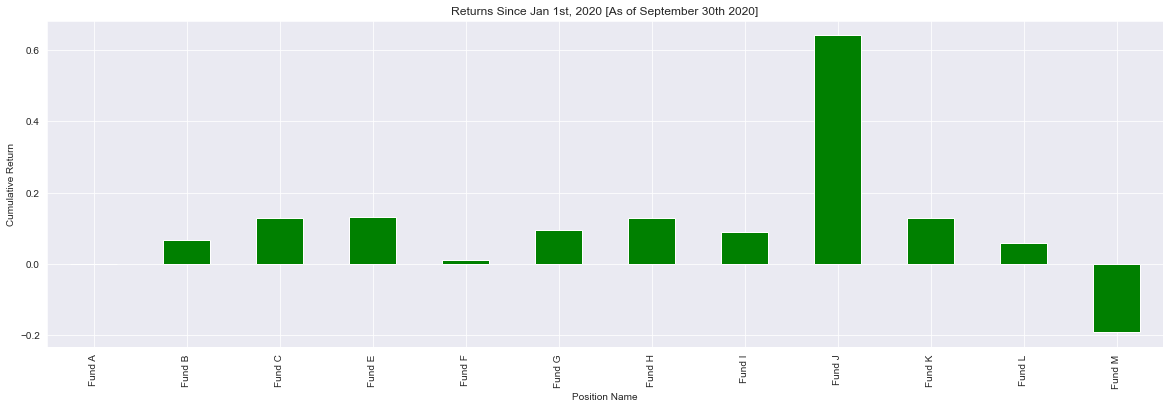

In [27]:
#By return since Jan 1, 2020
plt4 = summary_df_final.plot(x="Position_Name",y="Return_Since_Jan", 
                      kind = 'bar',figsize = (20,6), color = "green",
                      legend = False, title = 'Returns Since Jan 1st, 2020 [As of September 30th 2020]')
plt4.set(xlabel = "Position Name", ylabel = "Cumulative Return");

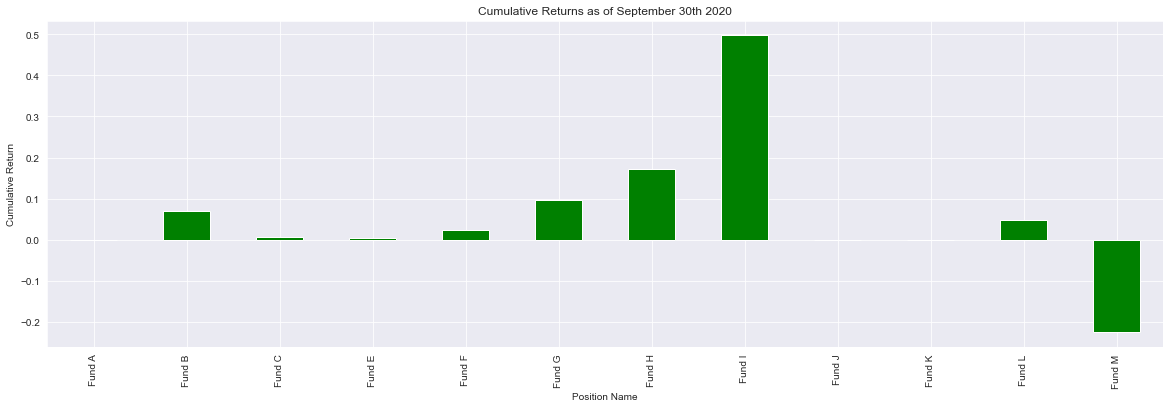

In [26]:
#By return to date
plt5 = summary_df_final.plot(x="Position_Name",y="1Y_Return", 
                      kind = 'bar',figsize = (20,6), color = "green",
                      legend = False, title = 'Cumulative Returns as of September 30th 2020')
plt5.set(xlabel = "Position Name", ylabel = "Cumulative Return");

#### Fancier visualizations

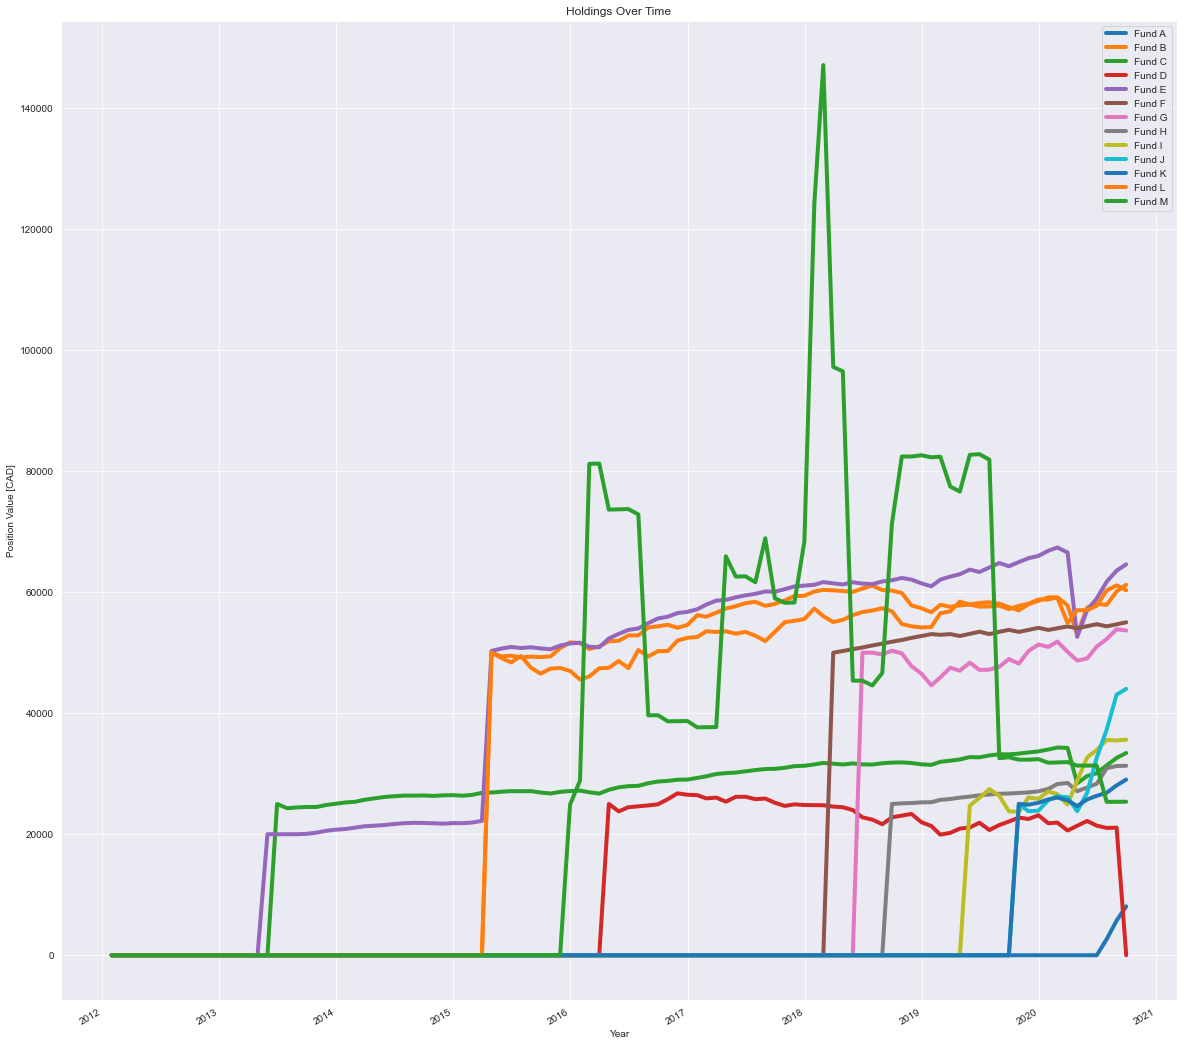

In [40]:
#Position values vs time
plt6 = fund2.plot(figsize = (20,20), title = 'Holdings Over Time',lw=4)
plt6.set(xlabel = "Year",ylabel = "Position Value [CAD]");

#### Exporting to excel

In [ ]:
#Exporting summary_df_final to an excel spreadsheet 
summary_df_final.to_excel('Monthly_Risk_Summary.xlsx')